In [3]:
import numpy as np
import pandas as pd  

In [4]:
df = pd.read_csv('labeled_comments.csv')
df.head()

,Comment,sentiment
0,Do you realise I discovered AI with your chane...,neutral
1,"Hold up, surgeons PUNCTURED SOMEONE'S SKULL AN...",negative
2,What really sucks is that it's good enough rig...,positive
3,Thanks for sharing it. ✌️,positive
4,"Remember Will Smith eating spaghetti, just wai...",neutral


In [5]:
df.shape

(3124, 2)

In [12]:
df.sample()['Comment'].values

array(['Thanks Togogo, your analysis is amways appreciated 🙏🏻'],
      dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Comment    3124 non-null   object
 1   sentiment  3124 non-null   object
dtypes: object(2)
memory usage: 48.9+ KB


In [8]:
df.isnull().sum()

Comment      0
sentiment    0
dtype: int64

In [11]:
df[df['Comment'].isna()]

,Comment,sentiment


In [14]:
df[df['Comment'].isna()]['sentiment'].value_counts()

Series([], Name: count, dtype: int64)

In [15]:
df.duplicated().sum()

np.int64(5)

In [16]:
df[df.duplicated()]

,Comment,sentiment
1527,Great video,positive
2036,we are living in idiocracy,neutral
2620,Great video.,positive
2659,The giggle at 12:06 got me. I don't think I've...,positive
3065,Do you realise I discovered AI with your chane...,neutral


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df[(df['Comment'].str.strip() == '')]

,Comment,sentiment


In [20]:
# Convert the 'clean_comment' column to lowercase
df['Comment'] = df['Comment'].str.lower()

# Verify the transformation by displaying the first few rows
df.head()


,Comment,sentiment
0,do you realise i discovered ai with your chane...,neutral
1,"hold up, surgeons punctured someone's skull an...",negative
2,what really sucks is that it's good enough rig...,positive
3,thanks for sharing it. ✌️,positive
4,"remember will smith eating spaghetti, just wai...",neutral


In [21]:
df[df['Comment'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,Comment,sentiment
510,oh noes.......the holy grail of tech is actual...,negative
2749,fauluret!,neutral


In [22]:
# Remove trailing and leading whitespaces from the 'clean_comment' column
df['Comment'] = df['Comment'].str.strip()

# Verify the transformation by checking for any remaining trailing whitespaces
df['Comment'].apply(lambda x: x.endswith(' ') or x.startswith(' ')).sum()

np.int64(0)

In [23]:
# Identify comments containing URLs
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
comments_with_urls = df[df['Comment'].str.contains(url_pattern, regex=True)]

# Display the comments containing URLs
comments_with_urls.head()


,Comment,sentiment
170,i predicted this over a year ago. \n\nhttps://...,neutral
659,ai bubble is real in certain circumstances but...,positive
699,youtube link. john oliver explaining scientif...,neutral
1305,one thing to note with ai video - power use fo...,positive
2008,what they call 'ai' is not ai at all. it has n...,positive


In [24]:
# Identify comments containing new line characters
comments_with_newline = df[df['Comment'].str.contains('\n')]

# Display the comments containing new line characters
comments_with_newline.head()


,Comment,sentiment
0,do you realise i discovered ai with your chane...,neutral
2,what really sucks is that it's good enough rig...,positive
5,i don't think ai will ever develop anything li...,positive
12,1:59\ni'd be more swayed by this study if it w...,negative
15,when chatgpt came out i started using it.\ni w...,positive


In [25]:
# Remove new line characters from the 'Comment' column
df['Comment'] = df['Comment'].str.replace('\n', ' ', regex=True)

# Verify the transformation by checking for any remaining new lines
comments_with_newline_remaining = df[df['Comment'].str.contains('\n')]
comments_with_newline_remaining


,Comment,sentiment


In [29]:
import re
df['clean_comment'] = (
    df['Comment']
    .fillna('')
    .str.replace(r'(https?://\S+|www\.\S+)', '', regex=True, flags=re.IGNORECASE)
    .str.replace(r'\s+', ' ', regex=True)  # collapse multiple spaces/newlines
    .str.strip()
)

In [30]:
df.loc[[ 170, 659,699,1305,2008]]

,Comment,sentiment,Clean_comment,clean_comment
170,i predicted this over a year ago. https://yo...,neutral,i predicted this over a year ago.,i predicted this over a year ago.
659,ai bubble is real in certain circumstances but...,positive,ai bubble is real in certain circumstances but...,ai bubble is real in certain circumstances but...
699,youtube link. john oliver explaining scientif...,neutral,youtube link. john oliver explaining scientif...,youtube link. john oliver explaining scientifi...
1305,one thing to note with ai video - power use fo...,positive,one thing to note with ai video - power use fo...,one thing to note with ai video - power use fo...
2008,what they call 'ai' is not ai at all. it has n...,positive,what they call 'ai' is not ai at all. it has n...,what they call 'ai' is not ai at all. it has n...


In [33]:
df_clean = df[['clean_comment', 'sentiment']]
df_clean.loc[[ 170, 659,699,1305,2008]]

,clean_comment,sentiment
170,i predicted this over a year ago.,neutral
659,ai bubble is real in certain circumstances but...,positive
699,youtube link. john oliver explaining scientifi...,neutral
1305,one thing to note with ai video - power use fo...,positive
2008,what they call 'ai' is not ai at all. it has n...,positive


In [34]:
df_clean['sentiment_encoded'] = df_clean['sentiment'].map({
    'negative': -1,
    'neutral': 0,
    'positive': 1
})

C:\Users\Urmi Kanrar\AppData\Local\Temp\ipykernel_2656\149704583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment_encoded'] = df_clean['sentiment'].map({


In [35]:
df_clean.head()

,clean_comment,sentiment,sentiment_encoded
0,do you realise i discovered ai with your chane...,neutral,0
1,"hold up, surgeons punctured someone's skull an...",negative,-1
2,what really sucks is that it's good enough rig...,positive,1
3,thanks for sharing it. ✌️,positive,1
4,"remember will smith eating spaghetti, just wai...",neutral,0


## EDA

<Axes: xlabel='sentiment', ylabel='count'>

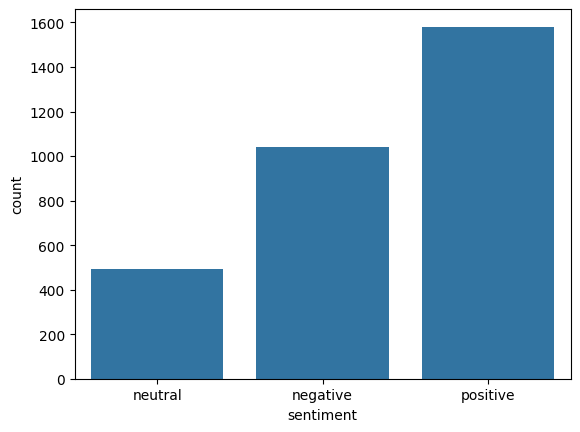

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# distribution of classes

sns.countplot(data=df_clean,x="sentiment")

In [38]:
# frequency distribution of sentiments

df_clean['sentiment'].value_counts(normalize=True).mul(100).round(2)

sentiment
positive    50.69
negative    33.44
neutral     15.87
Name: proportion, dtype: float64

In [39]:
df_clean['word_count'] = df_clean['clean_comment'].apply(lambda x: len(x.split()))

In [40]:
df_clean.sample(5)

,clean_comment,sentiment,sentiment_encoded,word_count
362,a.i. is undercooked ... all of the problems an...,negative,-1,56
810,thats why a society cannot trust a bunch of ai...,negative,-1,26
1892,"so it's a crazy expensive marketing tool, so d...",negative,-1,9
3076,"alternatively, ai can already replace 4% of jobs",neutral,0,8
728,"well done, coldfusion for using a real human. ...",negative,-1,18


In [41]:
df_clean['word_count'].describe()

count    3119.000000
mean       40.309715
std        48.362303
min         1.000000
25%        13.000000
50%        25.000000
75%        49.000000
max       647.000000
Name: word_count, dtype: float64

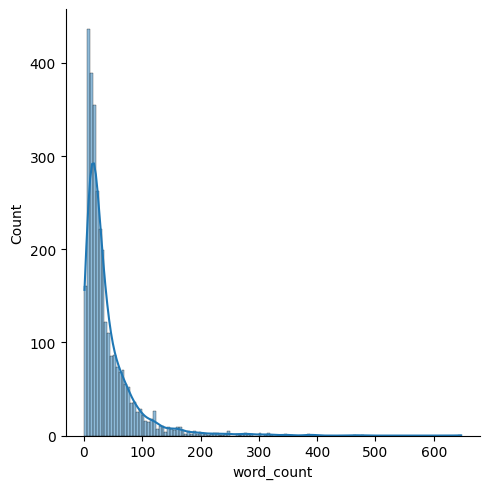

In [42]:
sns.displot(df_clean['word_count'], kde=True)

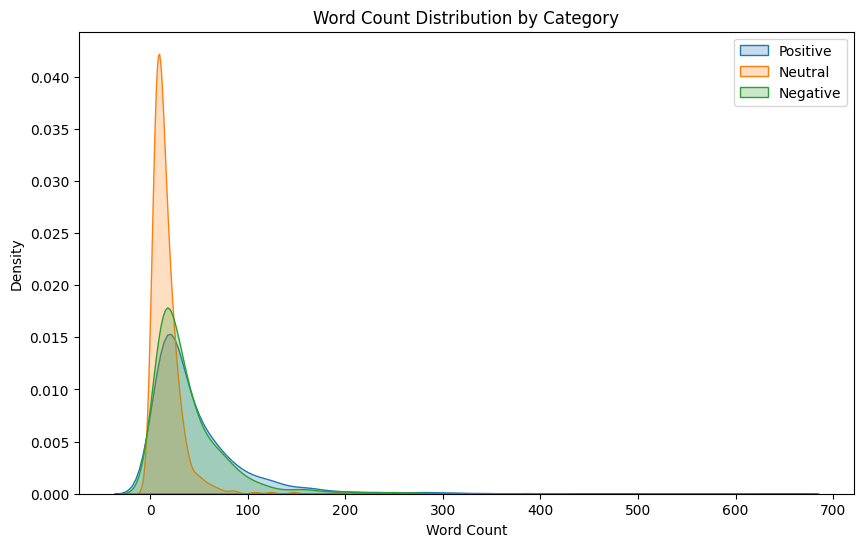

In [44]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df_clean[df_clean['sentiment_encoded'] == 1]['word_count'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df_clean[df_clean['sentiment_encoded'] == 0]['word_count'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df_clean[df_clean['sentiment_encoded'] == -1]['word_count'], label='Negative', fill=True)

# Add title and labels
plt.title('Word Count Distribution by Category')
plt.xlabel('Word Count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## 📊 Word Count Distribution Analysis by Sentiment

### 1️⃣ Neutral comments are the shortest (sharp tall peak near small word counts)

The orange curve shows:

- A very tall peak around **10–20 words**
- A rapid drop after that

**Interpretation:**  
Most neutral comments are short, such as:

- *"ok"*
- *"thanks"*
- *"interesting"*
- *"link"*
- *"video explains this"*

They usually do not require long explanations.

---

### 2️⃣ Positive and negative comments are longer on average

The blue (positive) and green (negative) curves show:

- Peaks around **20–40 words**
- Long tails extending to **200, 400, and even 600+ words**

**Interpretation:**  
When people express emotions (positive or negative), they tend to write more, including:

- opinions  
- arguments  
- explanations  
- stories  

Therefore, sentiment-rich comments are usually longer.

---

### 3️⃣ Long tail to the right (skewed distribution)

All curves are **right-skewed**, meaning:

- Many short comments  
- Few extremely long comments  

This is very common in text-based datasets (YouTube, Reddit, reviews, etc.).

**Example:**

- Most comments: **10–50 words**  
- Few comments: **long essays of 500+ words**

---

### 4️⃣ Strong overlap between positive and negative

The blue and green curves overlap heavily.

**Interpretation:**  
Word count alone cannot reliably separate **positive** and **negative** comments.  
However, it can help distinguish between:

- **neutral comments**  
- **emotional (positive or negative) comments**

---

<Axes: ylabel='word_count'>

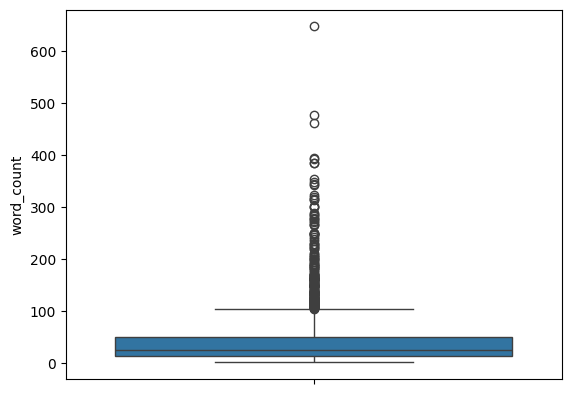

In [46]:
sns.boxplot(df_clean['word_count'])

The boxplot shows that most comments contain between 10 and 50 words, with a median around 25–30 words, while a small number of comments are extremely long, resulting in a right-skewed distribution with several high-value outliers.

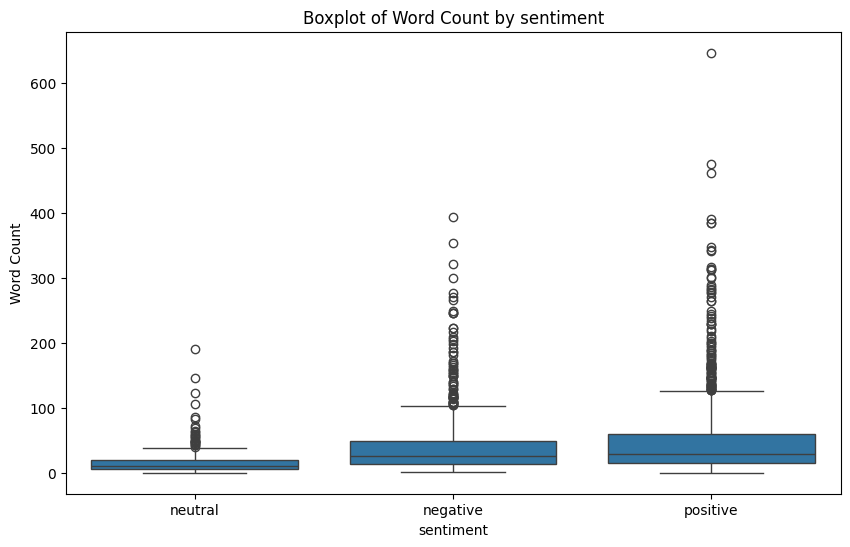

In [47]:
# Create a boxplot for the 'wordcount' column categorized by category
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='sentiment', y='word_count')
plt.title('Boxplot of Word Count by sentiment')
plt.xlabel('sentiment')
plt.ylabel('Word Count')
plt.show()

## Word Count Distribution by Sentiment

### Overview
This boxplot compares the distribution of word counts across three sentiment categories: neutral, negative, and positive.

### Key Findings

**1. Neutral texts are the shortest and most consistent**
- Neutral sentiment has the lowest median word count
- The interquartile range (IQR) is narrow, indicating less variability
- Fewer outliers compared to other sentiment classes

**2. Negative and positive texts are longer**
- Both negative and positive sentiments show higher median word counts than neutral
- The boxes are wider, suggesting greater variation in text length within these categories

**3. Positive texts show the highest word counts and greatest variability**
- Positive sentiment has the highest median and upper quartile values
- Contains numerous high-value outliers, with some texts exceeding 600 words
- Shows the most spread in the data

**4. All sentiment classes exhibit right-skewed distributions**
- Each category contains upper-end outliers
- Most texts cluster at shorter lengths, with a tail of longer documents
- This pattern is most pronounced in the positive sentiment class

### Implications for Analysis

Text length is **not uniformly distributed** across sentiment categories and may contain predictive signal. 



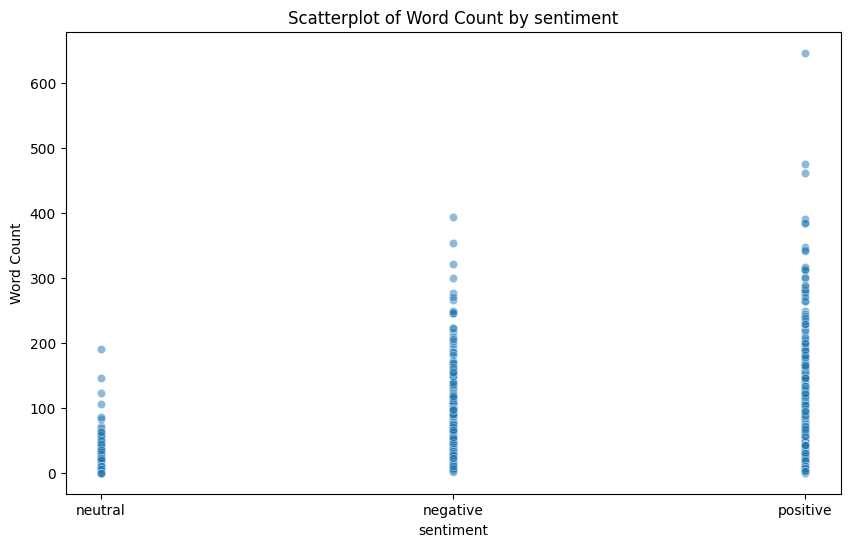

In [49]:
# Create a scatterplot between 'sentiment' and 'wordcount'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='sentiment', y='word_count', alpha=0.5)
plt.title('Scatterplot of Word Count by sentiment')
plt.xlabel('sentiment')
plt.ylabel('Word Count')
plt.show()

## Scatterplot of Word Count by Sentiment - Interpretation

### Overview
This scatterplot displays the distribution of word counts across three sentiment categories (neutral, negative, and positive), with each point representing an individual text document.

### Key Observations

**1. Neutral texts cluster at lower word counts**
- Most neutral texts fall below 200 words
- Dense concentration between 0-150 words
- Very few outliers, with one notable exception near 200 words
- Suggests neutral content tends to be brief and factual

**2. Negative texts show moderate length with wide range**
- Word counts span from near 0 to approximately 400 words
- Dense clustering between 0-300 words
- Vertical spread indicates high variability in how people express negative sentiment
- Some extended negative texts may represent detailed complaints or critical reviews

**3. Positive texts exhibit the greatest length and variability**
- Word counts range from 0 to over 650 words
- Heaviest concentration in the 200-400 word range
- Most extensive vertical spread of all three categories
- Multiple high-value outliers above 400 words

**4. Overall pattern: Sentiment intensity correlates with verbosity**
- Clear progression: neutral < negative < positive in terms of typical word count
- Positive sentiment appears to encourage more elaborate expression
- People may write more when enthusiastic or satisfied

**5. All categories show dense clustering at lower values**
- Each sentiment class has a concentration of short texts (0-100 words)
- Suggests many brief statements across all sentiment types
- Longer texts are less common but present in all categories

### Analytical Implications

**For sentiment classification:**
- Word count may serve as a weak but useful feature
- Model should account for length variability within each class
- Longer texts aren't necessarily more positive, but positive texts tend to be longer on average

**For data quality:**
- Very short texts (near 0 words) may be data quality issues worth investigating
- Extreme outliers (>500 words) might represent specific content types (detailed reviews, articles)

**For business insights:**
- Positive feedback tends to be more detailed - customers may elaborate when satisfied
- Neutral responses are terse - potential indicator of indifference
- Negative feedback varies widely - some customers vent extensively, others keep it brief

<Axes: xlabel='sentiment', ylabel='word_count'>

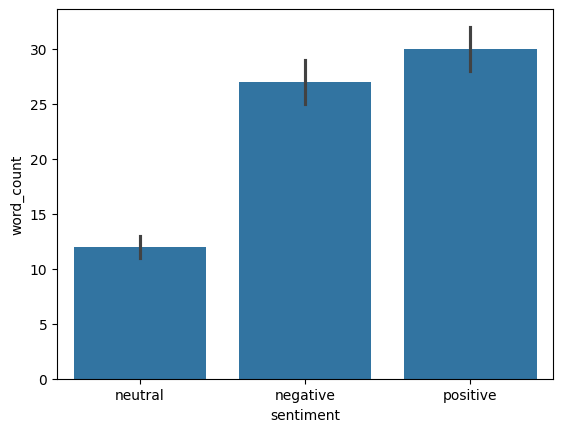

In [50]:
# median word counts among sentiments

sns.barplot(df_clean,x='sentiment',y='word_count',estimator='median')

# Interpretation: Median Word Count by Sentiment

## Overview
This analysis examines the relationship between sentiment categories (neutral, negative, positive) and the median word count of text entries in the dataset.

## Key Findings from the Plot

### Word Count Distribution
- **Neutral sentiment**: ~12 words (median)
- **Negative sentiment**: ~27 words (median)
- **Positive sentiment**: ~30 words (median)

### Main Observations

**1. Neutral Texts are Shortest**
- Neutral sentiments have significantly lower word counts (~12 words)
- Suggests brief, factual statements without emotional elaboration
- People express neutral opinions concisely and directly

**2. Negative Sentiments are Moderately Long**
- Negative texts average ~27 words
- People tend to elaborate when expressing complaints or dissatisfaction
- Negative experiences often require more explanation and context
- Users may provide details about what went wrong

**3. Positive Sentiments are Longest**
- Positive texts have the highest median at ~30 words
- People write more when expressing satisfaction or enthusiasm
- Positive reviews often include detailed praise and recommendations
- Users may share specific aspects they enjoyed

### Variability (Error Bars)
- All three categories show error bars indicating variability in word counts
- Positive and negative sentiments have slightly more variation than neutral
- This suggests emotional content (positive/negative) naturally varies more in length

## Interpretation

**Pattern Identified:**
There's a clear trend: **Emotional content (both positive and negative) generates longer text than neutral content**

**Why This Matters:**
- Neutral statements are typically brief and informational
- Emotional investment (positive or negative) leads to more detailed expression
- Positive sentiments slightly edge out negative ones, possibly due to enthusiastic elaboration



In [51]:
!pip install nltk

In [52]:
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')

# Define the list of English stopwords
stop_words = set(stopwords.words('english'))

# Create a new column 'num_stop_words' by counting the number of stopwords in each comment
df_clean['num_stop_words'] = df_clean['clean_comment'].apply(lambda x: len([word for word in x.split() if word in stop_words]))


[nltk_data] Downloading package stopwords to C:\Users\Urmi
[nltk_data]     Kanrar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
df_clean.sample(5)

,clean_comment,sentiment,sentiment_encoded,word_count,num_stop_words
2521,both me and my dad got to experience the failu...,negative,-1,79,38
1889,"as an english teacher, i’ve failed many a stud...",negative,-1,46,14
1645,i think we have to understand that the ceos an...,negative,-1,300,148
1592,what ai showed us is how freaking low the bar ...,negative,-1,12,5
1166,it definitely doesn't help that the focus in a...,negative,-1,35,15


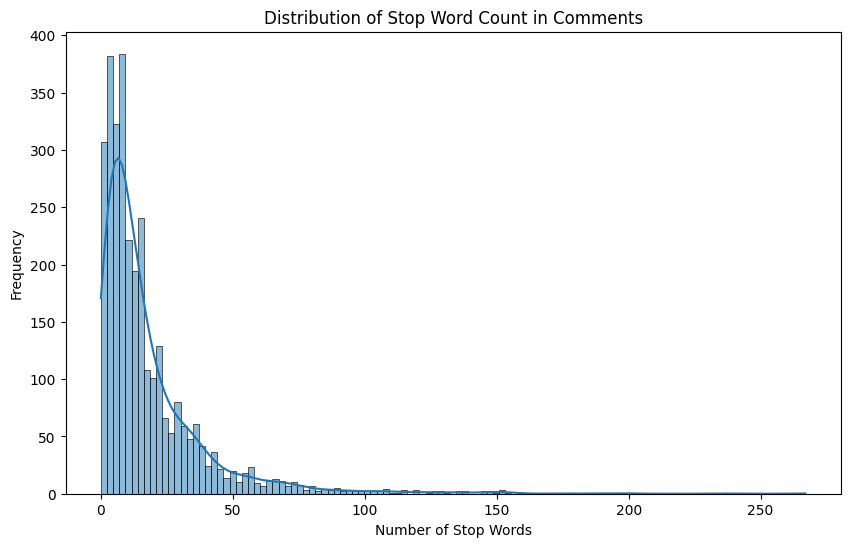

In [54]:
# Create a distribution plot (displot) for the 'num_stop_words' column
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['num_stop_words'], kde=True)
plt.title('Distribution of Stop Word Count in Comments')
plt.xlabel('Number of Stop Words')
plt.ylabel('Frequency')
plt.show()


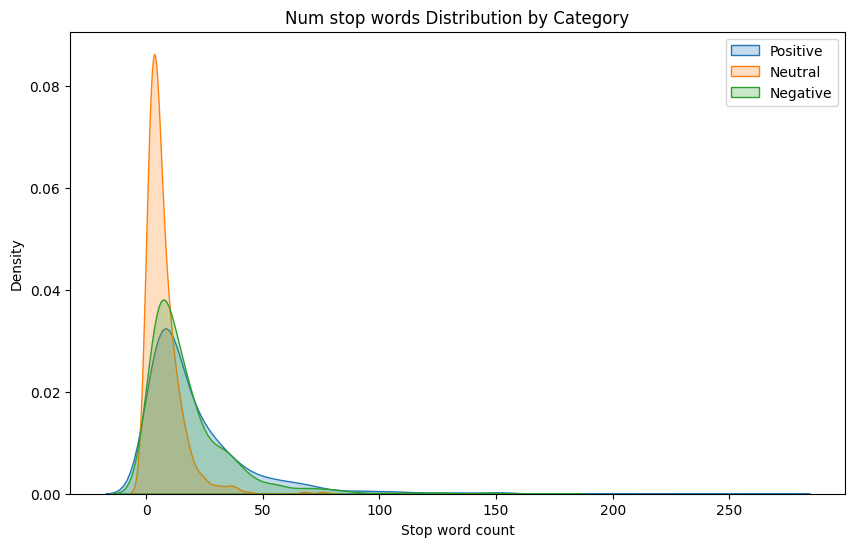

In [58]:
# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot KDE for category 1
sns.kdeplot(df_clean[df_clean['sentiment_encoded'] == 1]['num_stop_words'], label='Positive', fill=True)

# Plot KDE for category 0
sns.kdeplot(df_clean[df_clean['sentiment_encoded'] == 0]['num_stop_words'], label='Neutral', fill=True)

# Plot KDE for category -1
sns.kdeplot(df_clean[df_clean['sentiment_encoded'] == -1]['num_stop_words'], label='Negative', fill=True)

# Add title and labels
plt.title('Num stop words Distribution by Category')
plt.xlabel('Stop word count')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='sentiment', ylabel='num_stop_words'>

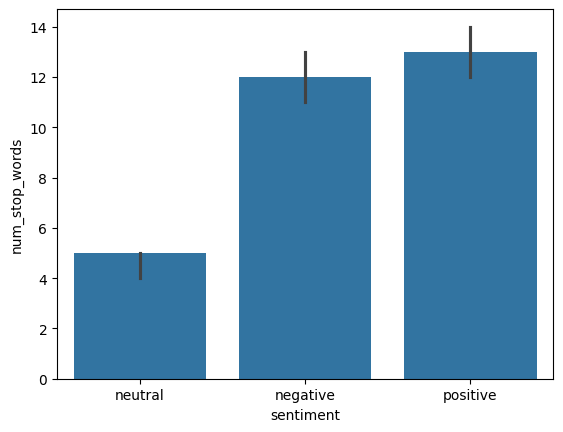

In [59]:
# median word counts among sentiments

sns.barplot(df_clean,x='sentiment',y='num_stop_words',estimator='median')

C:\Users\Urmi Kanrar\AppData\Local\Temp\ipykernel_2656\3327407625.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')


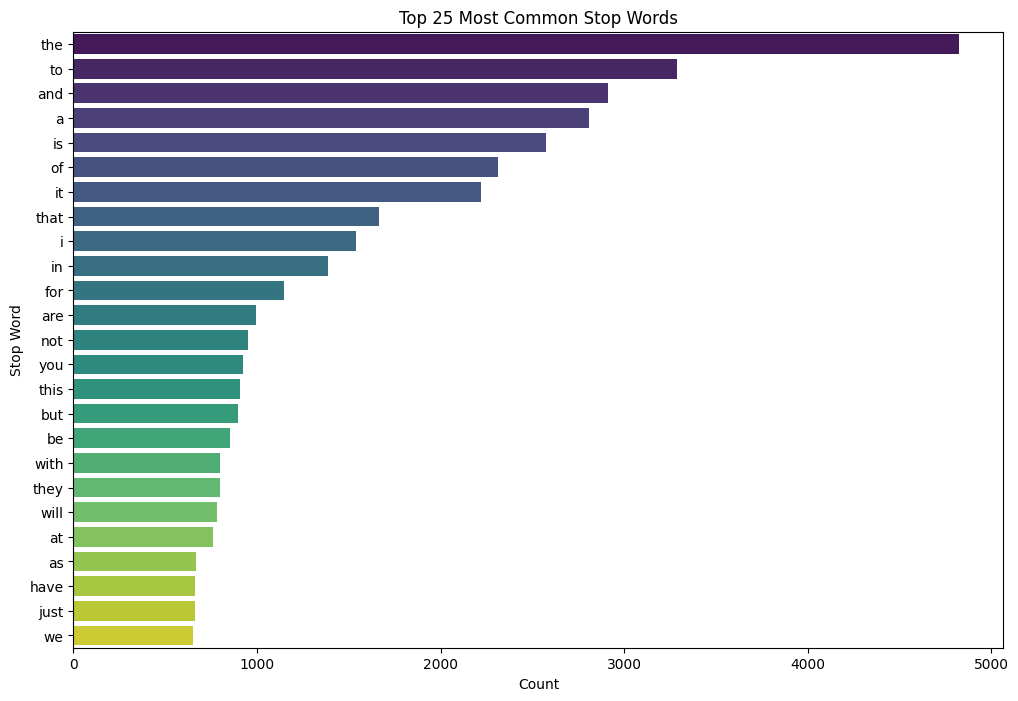

In [60]:
# Create a frequency distribution of stop words in the 'clean_comment' column
from collections import Counter

# Extract all stop words from the comments using the previously defined 'common_stopwords'
all_stop_words = [word for comment in df_clean['clean_comment'] for word in comment.split() if word in stop_words]

# Count the most common stop words
most_common_stop_words = Counter(all_stop_words).most_common(25)

# Convert the most common stop words to a DataFrame for plotting
top_25_df = pd.DataFrame(most_common_stop_words, columns=['stop_word', 'count'])

# Create the barplot for the top 25 most common stop words
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_df, x='count', y='stop_word', palette='viridis')
plt.title('Top 25 Most Common Stop Words')
plt.xlabel('Count')
plt.ylabel('Stop Word')
plt.show()



In [62]:
df_clean['num_chars'] = df_clean['clean_comment'].apply(len)

df_clean.head()

,clean_comment,sentiment,sentiment_encoded,word_count,num_stop_words,num_chars
0,do you realise i discovered ai with your chane...,neutral,0,29,15,138
1,"hold up, surgeons punctured someone's skull an...",negative,-1,20,7,116
2,what really sucks is that it's good enough rig...,positive,1,100,57,518
3,thanks for sharing it. ✌️,positive,1,5,1,25
4,"remember will smith eating spaghetti, just wai...",neutral,0,9,4,54


In [63]:
df_clean['num_chars'].describe()

count    3119.000000
mean      222.781020
std       274.780294
min         5.000000
25%        68.000000
50%       133.000000
75%       272.000000
max      3693.000000
Name: num_chars, dtype: float64

In [64]:
from collections import Counter

# Combine all comments into one large string
all_text = ' '.join(df_clean['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)



In [65]:
char_frequency_df['character'].values

array([' ', 'e', 't', 'a', 'i', 'o', 'n', 's', 'r', 'l', 'h', 'd', 'u',
       'c', 'm', 'g', 'y', 'p', 'w', 'f', 'b', '.', 'v', 'k', ',', "'",
       'j', 'x', '"', '0', '-', '?', '’', '1', '%', '2', 'q', ':', '!',
       '5', 'z', ')', '4', '(', '9', '3', '6', '😂', '/', '8', '7', '*',
       '“', '”', '…', ';', '$', '—', '_', '+', '😅', '🤣', '&', '\u200b',
       '@', '=', '>', '‘', '️', '~', '😆', '–', '🎉', '\u200d', '😮', '😢',
       '😭', '´', '🙄', '^', '𝙤', '👏', '❤', '🏻', '😊', '👍', '￼', '💀', '•',
       '#', '🏾', '→', '𝙬', '‑', '🙂', '😄', '<', '🤩', ']', '[', '❌', '♀',
       '✅', '°', '🤨', '🥳', '💥', '𝙣', '𝙩', '🤦', '🙏', '`', '🤷', '🤖', '☹',
       '👀', '💯', '😔', '𝙚', '𝙡', '𝙥', '👨', '🚀', '💸', '𝙠', '𝙙', '🏼', '𝙞',
       '𝙖', '😁', '🤔', '💨', '𝙝', '😎', '𝙛', '🙃', '♂', '😏', '↗', '✌', '🫧',
       '≠', 'α', '🐥', '🦀', '🤯', '😬', '😐', '👉', '🌫', '🙈', '🙉', '🙊', '😶',
       '🥱', '🐕', '💻', '🪄', '🌎', '♥', '🕺', '🏌', '🎵', '„', '🤌', '😤', '🧠',
       '\\', '😓', '😒', '😵', '―', '💅', '£', '⸻', '𝙧', '𝙄', '😳', '

In [66]:
char_frequency_df.tail(50)

,character,frequency
127,♥,1
128,🕺,1
118,🏌,1
114,🎵,1
115,„,1
116,🤌,1
122,😤,1
123,🧠,1
121,\,1
88,😓,1


In [67]:
# Create a new column 'num_punctuation_chars' to count punctuation characters in each comment
df_clean['num_punctuation_chars'] = df_clean['clean_comment'].apply(
    lambda x: sum([1 for char in x if char in '.,!?;:"\'()[]{}-'])
)

df_clean.sample(5)

,clean_comment,sentiment,sentiment_encoded,word_count,num_stop_words,num_chars,num_punctuation_chars
957,this video is giving people the wrong kind of ...,positive,1,169,66,927,24
2312,"ah yes, the extremely original and interesting...",positive,1,16,6,91,3
981,i can't wait till the bubble bursts; we'll all...,neutral,0,23,11,132,4
916,ai is a much faster search engine. nothing mor...,negative,-1,27,10,160,5
1952,"so, the ghost malls in the usa are probably wh...",positive,1,36,18,187,4


In [68]:
df_clean['num_punctuation_chars'].describe()

count    3119.000000
mean        6.125040
std         8.503994
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max       123.000000
Name: num_punctuation_chars, dtype: float64

C:\Users\Urmi Kanrar\AppData\Local\Temp\ipykernel_2656\1638384091.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')


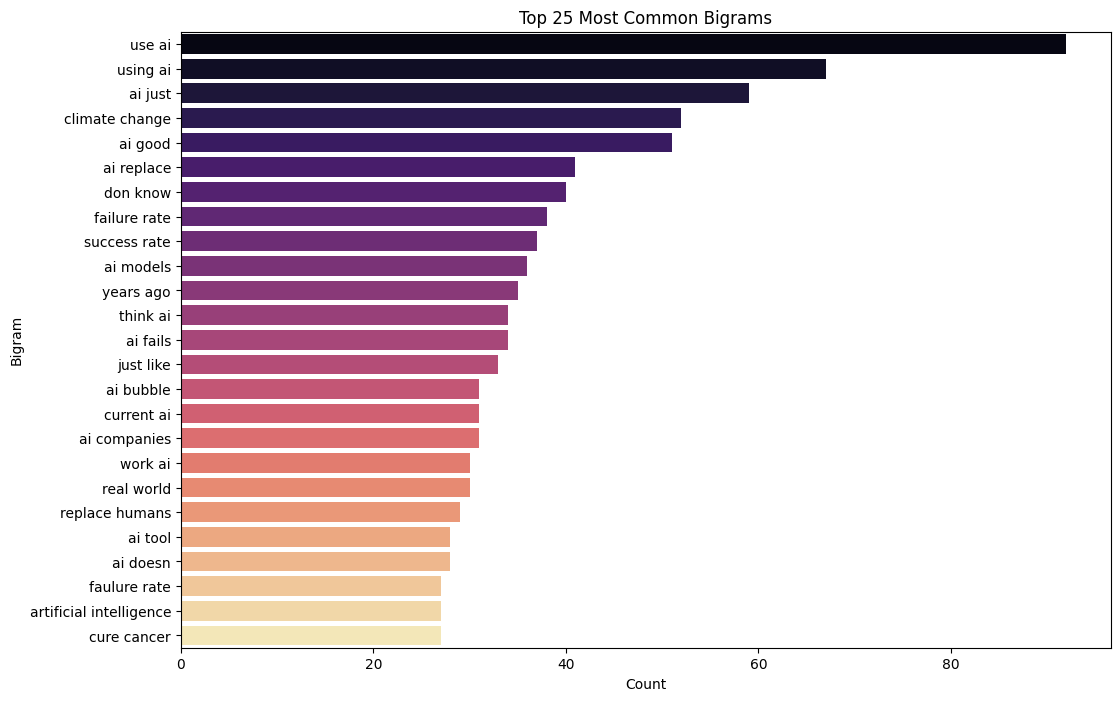

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a function to extract the top 25 bigrams
def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 bigrams
top_25_bigrams = get_top_ngrams(df['clean_comment'], 25)

# Convert the bigrams into a DataFrame for plotting
top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['bigram', 'count'])

# Plot the countplot for the top 25 bigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_bigrams_df, x='count', y='bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Count')
plt.ylabel('Bigram')
plt.show()


C:\Users\Urmi Kanrar\AppData\Local\Temp\ipykernel_2656\2492861520.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')


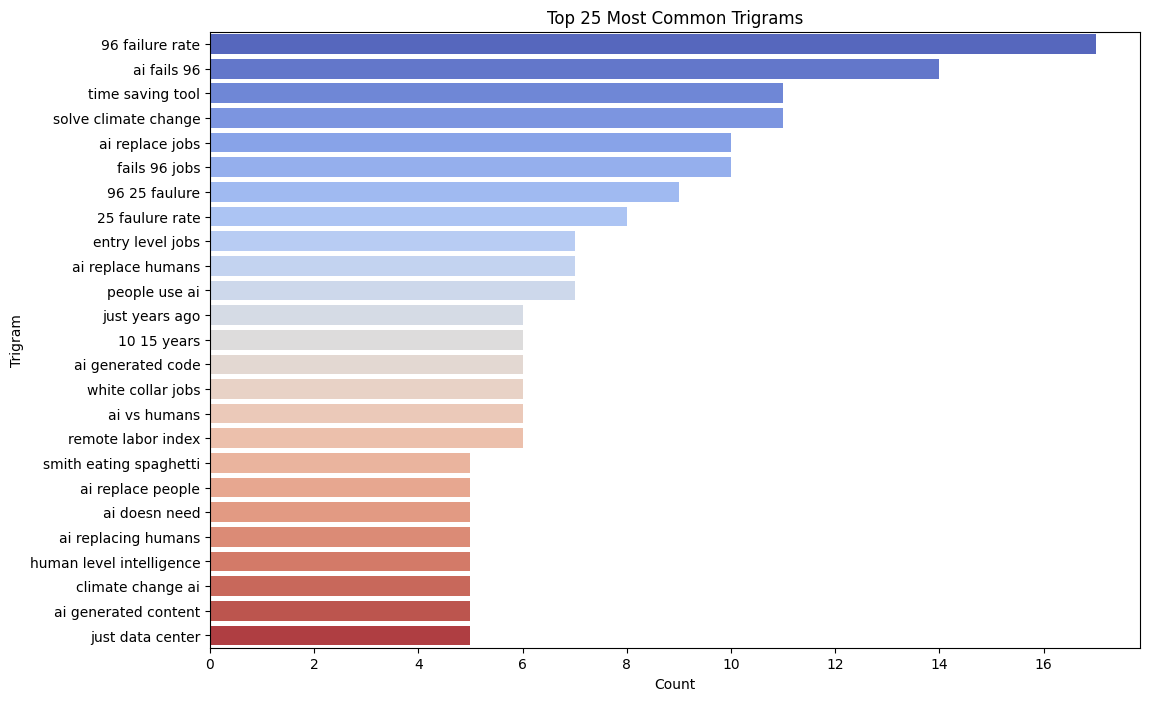

In [70]:
# Create a function to extract the top 25 trigrams
def get_top_trigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 25 trigrams
top_25_trigrams = get_top_trigrams(df['clean_comment'], 25)

# Convert the trigrams into a DataFrame for plotting
top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['trigram', 'count'])

# Plot the countplot for the top 25 trigrams
plt.figure(figsize=(12, 8))
sns.barplot(data=top_25_trigrams_df, x='count', y='trigram', palette='coolwarm')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Count')
plt.ylabel('Trigram')
plt.show()

In [71]:
# Remove non-English characters from the 'clean_comment' column
# Keeping only standard English letters, digits, and common punctuation
import re

df_clean['clean_comment'] = df_clean['clean_comment'].apply(lambda x: re.sub(r'[^A-Za-z0-9\s!?.,]', '', str(x)))


In [72]:
all_text = ' '.join(df_clean['clean_comment'])

# Count the frequency of each character
char_frequency = Counter(all_text)

# Convert the character frequency into a DataFrame for better display
char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['character', 'frequency']).sort_values(by='frequency', ascending=False)

char_frequency_df

,character,frequency
2,,125725
6,e,64534
14,t,53184
7,a,45553
9,i,43158
1,o,42435
16,n,36777
10,s,36422
5,r,29226
8,l,25376


In [73]:
df_clean.head()

,clean_comment,sentiment,sentiment_encoded,word_count,num_stop_words,num_chars,num_punctuation_chars
0,do you realise i discovered ai with your chane...,neutral,0,29,15,138,5
1,"hold up, surgeons punctured someones skull and...",negative,-1,20,7,116,4
2,what really sucks is that its good enough righ...,positive,1,100,57,518,12
3,thanks for sharing it.,positive,1,5,1,25,1
4,"remember will smith eating spaghetti, just wai...",neutral,0,9,4,54,1


In [74]:
from nltk.corpus import stopwords

# Defining stop words but keeping essential ones for sentiment analysis
stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet'}

# Remove stop words from 'clean_comment' column, retaining essential ones
df_clean['clean_comment'] = df_clean['clean_comment'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)




In [ ]:
df.head()

,clean_comment,category,word_count,num_stop_words,num_chars,num_punctuation_chars
0,family mormon never tried explain still stare ...,1,39,13,259,0
1,buddhism much lot compatible christianity espe...,1,196,59,1268,0
2,seriously say thing first get complex explain ...,-1,86,40,459,0
3,learned want teach different focus goal not wr...,0,29,15,167,0
4,benefit may want read living buddha living chr...,1,112,45,690,0


In [75]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

# Define the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the 'clean_comment_no_stopwords' column
df_clean['clean_comment'] = df_clean['clean_comment'].apply(
    lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()])
)

df_clean.head()

[nltk_data] Downloading package wordnet to C:\Users\Urmi
[nltk_data]     Kanrar\AppData\Roaming\nltk_data...


,clean_comment,sentiment,sentiment_encoded,word_count,num_stop_words,num_chars,num_punctuation_chars
0,realise discovered ai chanel end 2022 ! world ...,neutral,0,29,15,138,5
1,"hold up, surgeon punctured someone skull cause...",negative,-1,20,7,116,4
2,really suck good enough right get like 8090 wa...,positive,1,100,57,518,12
3,thanks sharing it.,positive,1,5,1,25,1
4,"remember smith eating spaghetti, wait",neutral,0,9,4,54,1


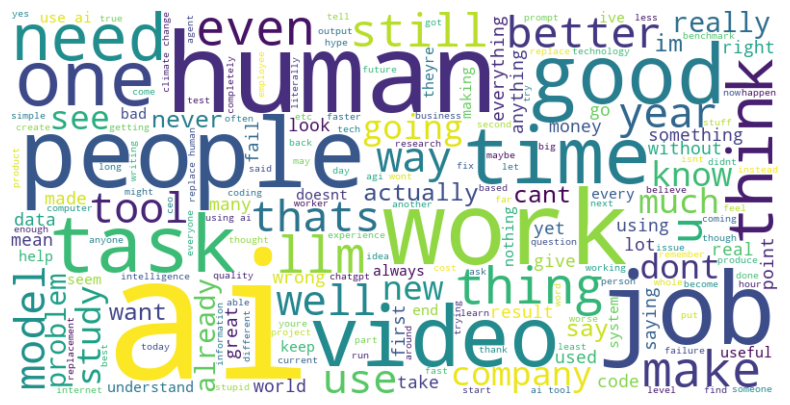

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df_clean['clean_comment'])

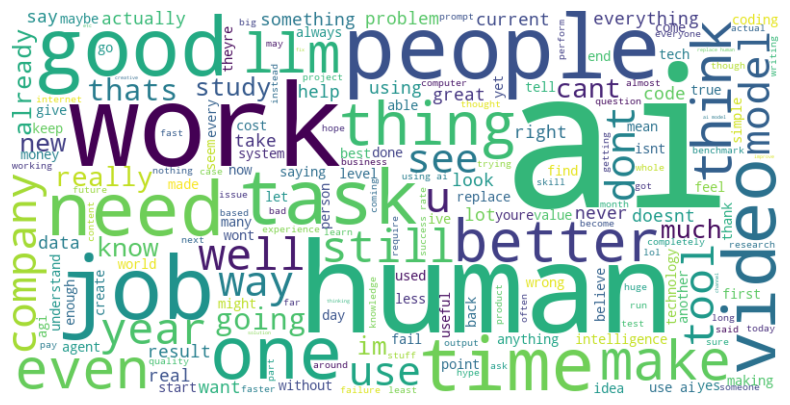

In [77]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df_clean[df_clean['sentiment_encoded'] == 1]['clean_comment'])

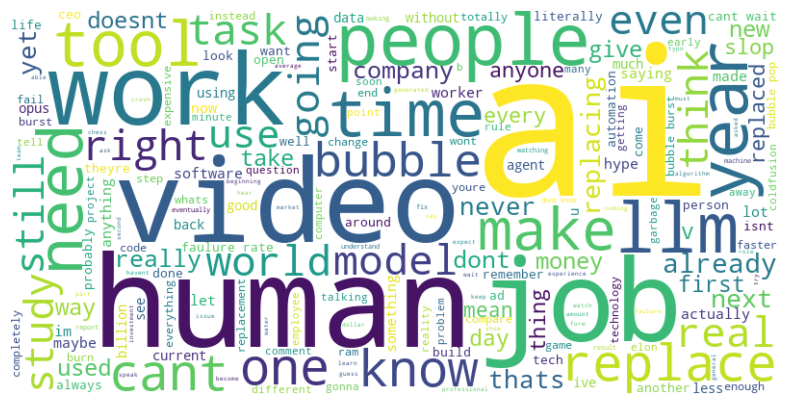

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df_clean[df_clean['sentiment_encoded'] == 0]['clean_comment'])

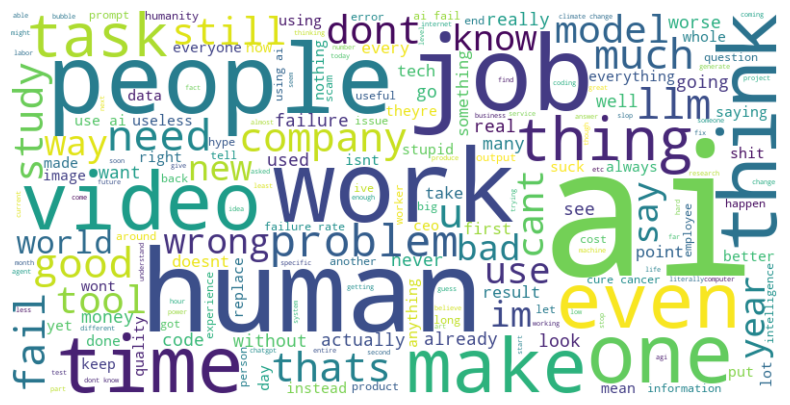

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot_word_cloud(df_clean[df_clean['sentiment_encoded'] == -1]['clean_comment'])

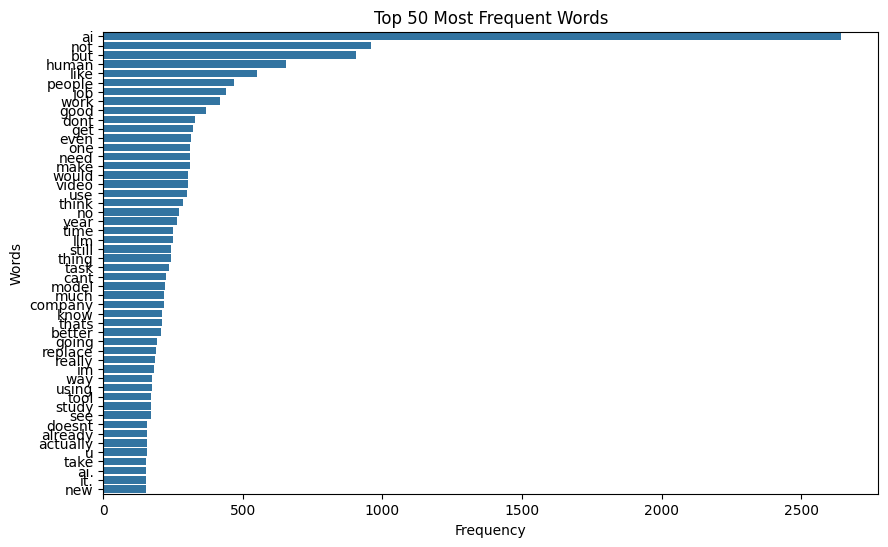

In [80]:
def plot_top_n_words(df, n=20):
    """Plot the top N most frequent words in the dataset."""
    # Flatten all words in the content column
    words = ' '.join(df['clean_comment']).split()

    # Get the top N most common words
    counter = Counter(words)
    most_common_words = counter.most_common(n)

    # Split the words and their counts for plotting
    words, counts = zip(*most_common_words)

    # Plot the top N words
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

# Example usage
plot_top_n_words(df_clean, n=50)


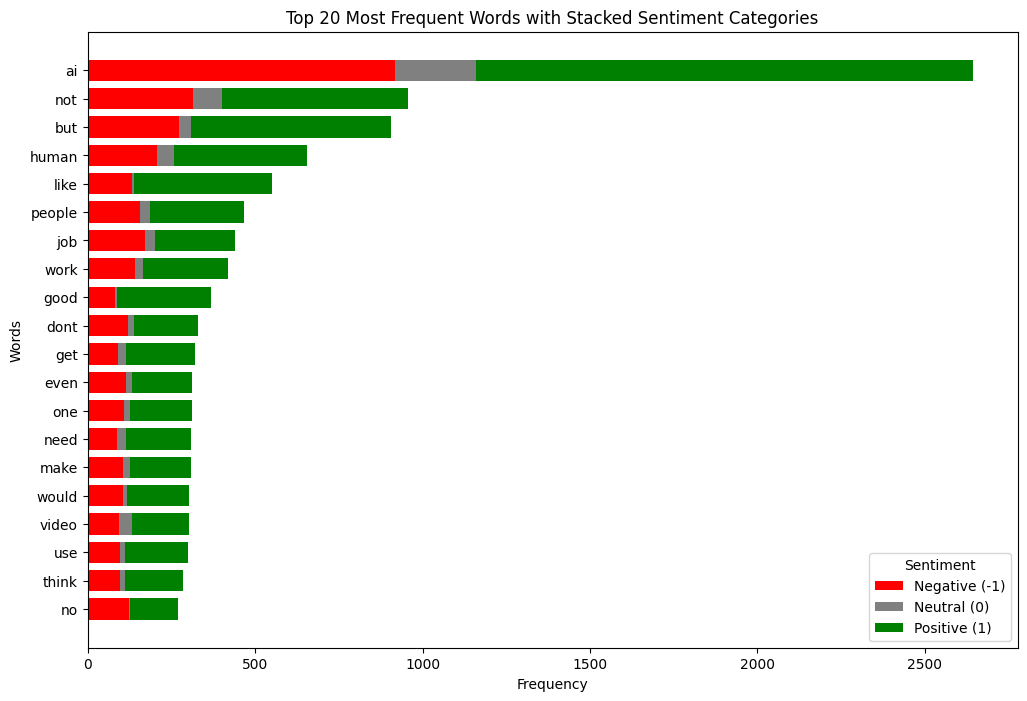

In [82]:
def plot_top_n_words_by_category(df_clean, n=20, start=0):
    """Plot the top N most frequent words in the dataset with stacked hue based on sentiment category."""
    # Flatten all words in the content column and count their occurrences by category
    word_category_counts = {}

    for idx, row in df_clean.iterrows():
        words = row['clean_comment'].split()
        category = row['sentiment_encoded']  # Assuming 'category' column exists for -1, 0, 1 labels

        for word in words:
            if word not in word_category_counts:
                word_category_counts[word] = { -1: 0, 0: 0, 1: 0 }  # Initialize counts for each sentiment category

            # Increment the count for the corresponding sentiment category
            word_category_counts[word][category] += 1

    # Get total counts across all categories for each word
    total_word_counts = {word: sum(counts.values()) for word, counts in word_category_counts.items()}

    # Get the top N most frequent words across all categories
    most_common_words = sorted(total_word_counts.items(), key=lambda x: x[1], reverse=True)[start:start+n]
    top_words = [word for word, _ in most_common_words]

    # Prepare data for plotting
    word_labels = top_words
    negative_counts = [word_category_counts[word][-1] for word in top_words]
    neutral_counts = [word_category_counts[word][0] for word in top_words]
    positive_counts = [word_category_counts[word][1] for word in top_words]

    # Plot the stacked bar chart
    plt.figure(figsize=(12, 8))
    bar_width = 0.75

    # Plot negative, neutral, and positive counts in a stacked manner
    plt.barh(word_labels, negative_counts, color='red', label='Negative (-1)', height=bar_width)
    plt.barh(word_labels, neutral_counts, left=negative_counts, color='gray', label='Neutral (0)', height=bar_width)
    plt.barh(word_labels, positive_counts, left=[i+j for i,j in zip(negative_counts, neutral_counts)], color='green', label='Positive (1)', height=bar_width)

    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Frequent Words with Stacked Sentiment Categories')
    plt.legend(title='Sentiment', loc='lower right')
    plt.gca().invert_yaxis()  # Invert y-axis to show the highest frequency at the top
    plt.show()



plot_top_n_words_by_category(df_clean, n=20)
